# Assignment 1(due on 12/06)

## Student:吕嘉杰（12331300），Gtihub：lyujiajie

## 批改人：张鹏

## 得分：22/30

C:\Users\jiaji\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\jiaji\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


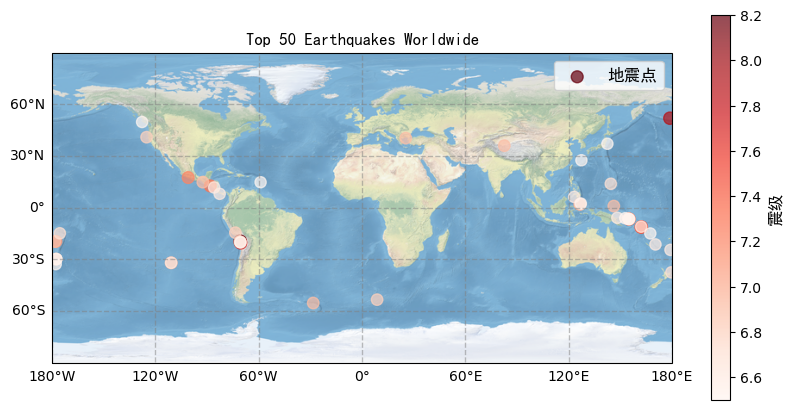

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.font_manager import FontProperties

# 设置中文字体
font_properties = FontProperties(fname='C:\\Windows\\Fonts\\simhei.ttf', size=12)  # 请替换为您系统中的中文字体文件路径

def plot_earthquakes():
    # 读取 CSV 文件
    df = pd.read_csv('usgs_earthquakes.csv')

    # 按震级降序排列并选择前50个记录
    top_50_earthquakes = df.sort_values(by='mag', ascending=False).head(50)

    # 清理包含 NaN 或 inf 的行
    top_50_earthquakes = top_50_earthquakes.dropna(subset=['latitude', 'longitude'])
    top_50_earthquakes = top_50_earthquakes.replace([np.inf, -np.inf], np.nan).dropna(subset=['latitude', 'longitude'])

    # Filter out any remaining NaN or inf values in latitude and longitude
    top_50_earthquakes = top_50_earthquakes[np.isfinite(top_50_earthquakes['latitude']) & np.isfinite(top_50_earthquakes['longitude'])]

    # 创建全球地图，使用 PlateCarree 投影
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

    # 添加地图特征
    ax.stock_img()

    # 标注地震点，并为散点图添加标签
    scatter = ax.scatter(top_50_earthquakes['longitude'], top_50_earthquakes['latitude'],
                         c=top_50_earthquakes['mag'], cmap='Reds', s=top_50_earthquakes['mag'] * 10, alpha=0.7,
                         label='地震点', transform=ccrs.PlateCarree())

    # 添加颜色标尺
    cbar = plt.colorbar(scatter, label='震级')
    cbar.set_label('震级', fontproperties=font_properties)

    # 添加网格线
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # 添加图例
    plt.legend(prop=font_properties)

    # 添加标题
    plt.title('Top 50 Earthquakes Worldwide', fontproperties=font_properties)
    plt.show()

if __name__ == '__main__':
    plot_earthquakes()

### 第一题代码运行正常，可以输出正确的图像。
### 得分：10/10
### ----------------------------------------------------

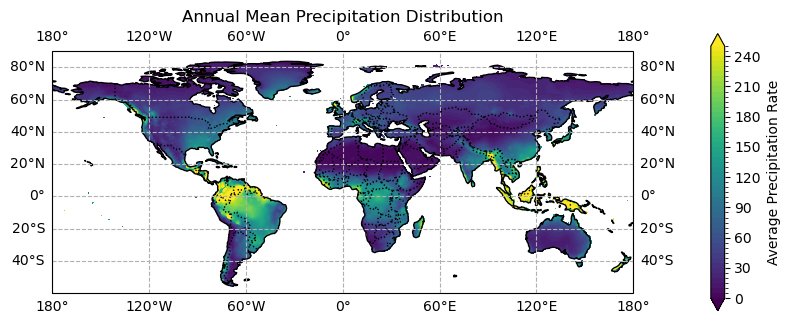

In [86]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 读取数据集
file_path = "pr_2021_YM.nc"
data = xr.open_dataset(file_path)

# 计算全年平均降水
annual_mean_pr = data['pr'].mean(dim='time')

# 绘制全球地图
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# 添加地图特征
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# 设置等值线范围
levels = np.linspace(0, 250, 51)  # 从0到250，共51个级别

# 绘制全年平均降水分布
im = annual_mean_pr.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),
                                  cbar_kwargs={'label': 'Average Precipitation Rate', 'pad': 0.1, 'shrink': 0.6},
                                  levels=levels, cmap='viridis')
# 添加网格线
ax.gridlines(draw_labels=True, linestyle='--')

# 添加标题和坐标轴标签
plt.title('Annual Mean Precipitation Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


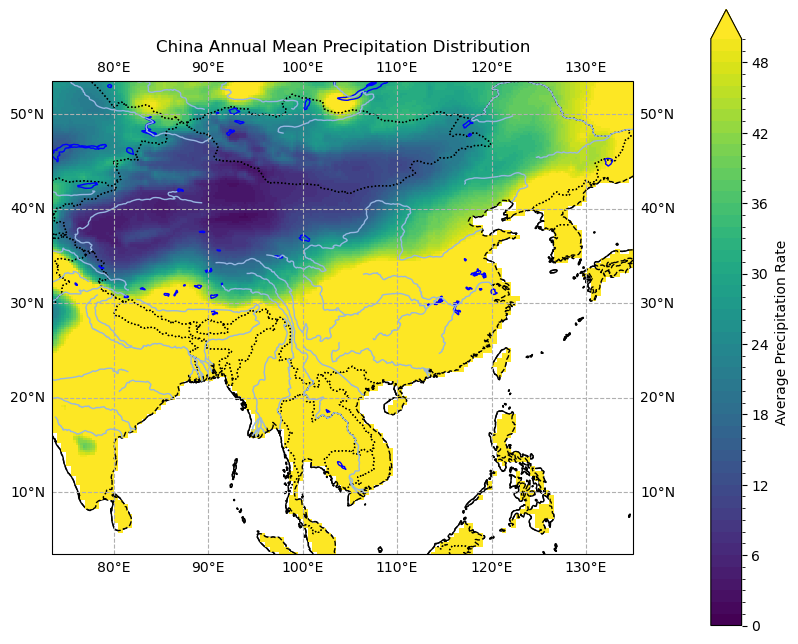

In [97]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. 打开数据集
file_path = "pr_2021_YM.nc"
data = xr.open_dataset(file_path)

# 2. 根据提供的坐标信息构建中国的多边形
china_bbox = box(73 + 29/60 + 59.79/3600, 3 + 31/60, 135 + 2/60 + 30/3600, 53 + 33/60)

# 3. 使用 where 函数进行空间选择，裁剪数据
china_data = data.where((data.lon >= china_bbox.bounds[0]) & (data.lon <= china_bbox.bounds[2]) &
                        (data.lat >= china_bbox.bounds[1]) & (data.lat <= china_bbox.bounds[3]), drop=True)

# 4. 绘制全年平均降水分布（中国范围）
levels = np.arange(0, 51, 1)
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
im = china_data['pr'].mean(dim='time').plot.imshow(ax=ax, transform=ccrs.PlateCarree(),
                                                    cbar_kwargs={'label': 'Average Precipitation Rate','pad': 0.1},
                                                    levels=levels, cmap='viridis')

ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linestyle='--')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='none')
ax.add_feature(cfeature.RIVERS)
ax.set_title('China Annual Mean Precipitation Distribution')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# 添加网格线
ax.gridlines(draw_labels=True, linestyle='--')

plt.show()


### 第二题代码运行正常，可以输出正确图像；
### 第一张图缺少x、y轴的经纬度文字（但添加了代码）、annotations、legend and text box
### 第二张图没有更换投影、缺少x、y轴的经纬度文字（但添加了代码）、annotations、legend and text box

### 得分：12/20
### ----------------------------------------------------